<a href="https://colab.research.google.com/github/alyukova/symmetrical-octo-pancake/blob/main/1_3_1_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D1%80%D1%8F%D0%B4%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/3e7c238f30c139029703519d0f8869cf/asset-v1:ITMO+bonus_track_tech+2023+type@asset+block/task5_617146.csv')
df

,y
0,9
1,7
2,28
3,35
4,25
...,...
95,260
96,253
97,277
98,278


In [54]:
df.index += 1
df

,y
1,9
2,7
3,28
4,35
5,25
...,...
96,260
97,253
98,277
99,278


In [ ]:
Задан временной ряд  из  элементов (см. файл). Ряд содержит шумы. Проведите экспоненциальное сглаживание временного ряда.
При сглаживании используйте коэффициент сглаживания 0.16.

In [55]:
  df['exp'] = df['y'].ewm(alpha = 0.16).mean()
  df

,y,exp
1,9,9.000000
2,7,7.913043
3,28,15.803897
4,35,21.920609
5,25,22.767486
...,...,...
96,260,245.850476
97,253,246.994400
98,277,251.795296
99,278,255.988049


In [56]:
import matplotlib.pyplot as plt

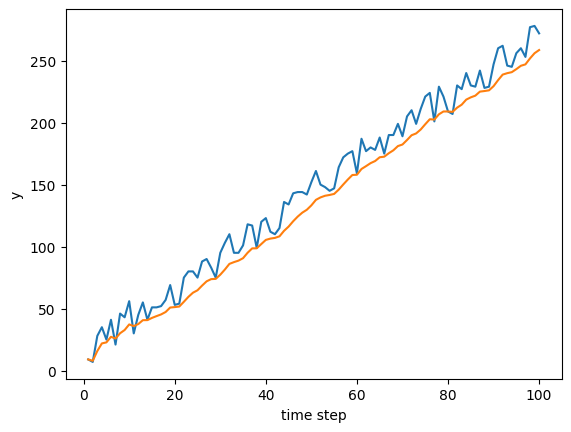

In [57]:
plt.plot('y', data = df)
plt.plot('exp', data = df)
plt.ylabel('y')
plt.xlabel('time step')
plt.show()

In [58]:
df.loc[50]

y      152.000000
exp    133.284822
Name: 50, dtype: float64

In [59]:
round(df['exp'].loc[50],2)

133.28

In [60]:
round(df['exp'].loc[100],2)

258.55

In [66]:
X = df.index.to_numpy()
y = df['y'].to_numpy()


In [70]:
poly= np.polyfit(X, y, 1)
poly

array([ 2.58079808, 14.88969697])

In [83]:
a = round(poly[0], 2)
b = round(poly[1], 2)
a

2.58

In [84]:
x = np.arange(1, 101)
df['lin'] = a*x + b

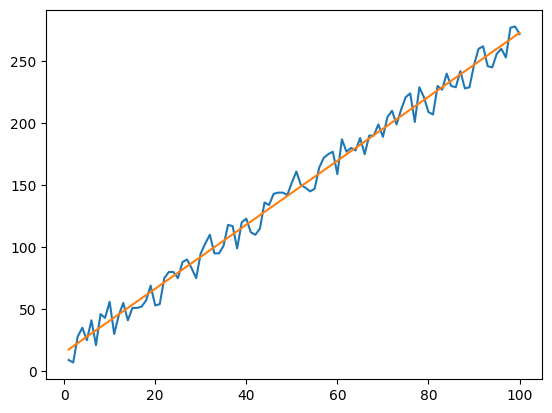

In [85]:
plt.plot('y', data = df)
plt.plot('lin', data = df)
plt.show()

In [86]:
from sklearn.metrics import r2_score
r2 = r2_score(df.y, df.lin)
r2

0.9865757790088783

In [87]:
r2 = round(r2, 2)
r2

0.99

In [89]:
y101 = a * 101 + b
round(y101, 0)

275.0